## Using this notebook to examine all the operations that can be applied to a convolutional neural network through example

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Conv1D, Conv2D, Convolution2D, InputLayer, MaxPooling2D, Flatten
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, Conv2D, Conv1D, InputLayer, Dropout
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

from PIL import Image

from Modeling import EbossWaveSpectraDataset

from astropy.io import fits

C:\Users\stone\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
doggo = plt.imread('doggo.jpg')
doggo_batch = np.expand_dims(doggo, 0)
doggo.shape, doggo_batch.shape

((300, 300, 3), (1, 300, 300, 3))

(1, 50, 50, 9)

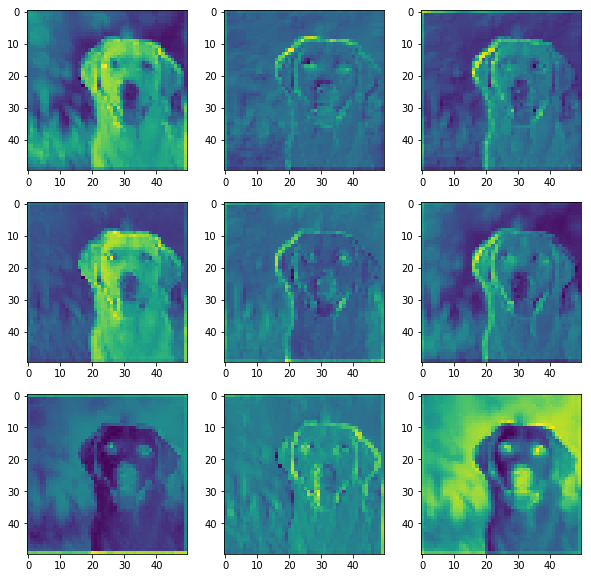

In [18]:
# Running through the model.
model = Sequential()
model.add(Conv2D(filters=9, kernel_size=(3,3), strides=1, input_shape=doggo.shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), padding='same'))
    
model.add(Conv2D(filters=9, kernel_size=(3,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

convs = model.predict(doggo_batch)

# Plotting Convolutions
fig, axs = plt.subplots(3,3, figsize=(10,10))
for ix, ax in enumerate(axs.flatten()):
    ax.imshow(convs[0,:,:,ix])
    
# Seeing the shape.
convs.shape

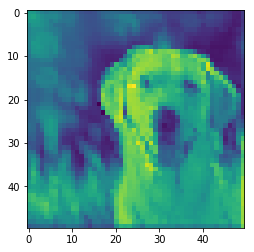

In [19]:
plt.imshow(convs[0][:,:,0])

# Gray Version

In [20]:
doggo_gray = Image.open('doggo.jpg').convert('L')
doggo_gray = np.asarray(doggo_gray)
doggo_gray = np.expand_dims(doggo_gray, -1)
doggo_gray_batch = np.expand_dims(doggo_gray, 0)

In [21]:
gray_model = Sequential()
gray_model.add(Conv2D(filters=3, kernel_size=(3,3), input_shape=doggo_gray.shape, activation='relu'))

(1, 300, 300, 9)

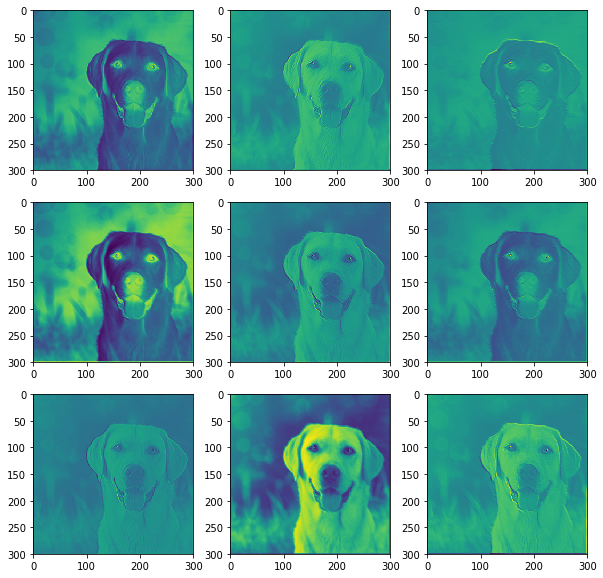

In [22]:
# Running through the model.
convs = model.predict(doggo_batch)

gray_model = Sequential()
gray_model.add(Conv2D(filters=9, kernel_size=(3,3), input_shape=doggo_gray.shape, padding='same'))
#gray_model.add(MaxPooling2D(pool_size=(3,3)))#, strides=1, padding='same'))
gray_convs = gray_model.predict(doggo_gray_batch)



# Plotting Convolutions
fig, axs = plt.subplots(3,3, figsize=(10,10))
for ix, ax in enumerate(axs.flatten()):
    ax.imshow(gray_convs[0,:,:,ix])
    
# Seeing the shape.
gray_convs.shape

# 1D spectra version

In [28]:
  ebsd = EbossWaveSpectraDataset('eboss_locations.csv')

label_mapper = lambda x: 0 if x == 'bad' else 1

x = np.ndarray((len(ebsd), 4639))
y = np.ndarray((len(ebsd)))
for i in range(len(ebsd)):
    stuff = ebsd[i]
    x[i] = stuff[0]
    y[i] = label_mapper(stuff[1].hit)

In [30]:
x.shape, y.shape

((281, 4639), (281,))

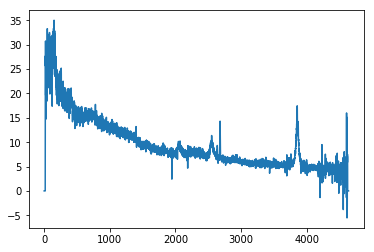

In [31]:
plt.plot(range(len(x[0])), x[0])

In [32]:
x = np.expand_dims(x, -1)
x.shape

(281, 4639, 1)

In [33]:
def create_spec_model():
    spectra_model = Sequential()
    spectra_model.add(Conv1D(64, kernel_size=2, padding='same', activation='relu', input_shape=(4639, 1)))
    #spectra_model.add(Conv1D(64, kernel_size=2, padding='same', activation='relu', input_shape=(4639, 1)))
    #spectra_model.add(Conv1D(64, kernel_size=2, padding='same', activation='relu'))
    spectra_model.add(MaxPooling1D(pool_size=2))
    #spectra_model.add(Conv1D(24, kernel_size=2, padding='same', activation='relu'))
    spectra_model.add(Conv1D(24, kernel_size=2, padding='same', activation='relu'))
    #spectra_model.add(Conv1D(24, kernel_size=2, padding='same', activation='relu'))
    spectra_model.add(MaxPooling1D(pool_size=2))
    #spectra_model.add(Conv1D(12, kernel_size=2, padding='same', activation='relu'))
    spectra_model.add(Conv1D(12, kernel_size=2, padding='same', activation='relu'))
    #spectra_model.add(Conv1D(12, kernel_size=2, padding='same', activation='relu'))
    spectra_model.add(MaxPooling1D(pool_size=2))
    spectra_model.add(Flatten())
    spectra_model.add(Dense(50, activation='relu'))
    #spectra_model.add(Dense(2048, activation='relu'))
    spectra_model.add(Dense(50, activation='relu'))
    spectra_model.add(Dense(1, activation='sigmoid'))
    spectra_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return spectra_model

In [77]:
spectra_model = Sequential()
spectra_model.add(Conv1D(9, kernel_size=6, padding='same', activation='relu', input_shape=(4639, 1)))
#spectra_model.add(MaxPooling1D(pool_size=2))
#spectra_model.add(Conv1D(9, kernel_size=2, padding='same', activation='relu'))
#spectra_model.add(MaxPooling1D(pool_size=2))
#spectra_model.add(Conv1D(64, kernel_size=2, padding='same', activation='relu'))
#spectra_model.add(MaxPooling1D(pool_size=2))
# spectra_model.add(Conv1D(24, kernel_size=2, padding='same', activation='relu'))
# spectra_model.add(Conv1D(24, kernel_size=2, padding='same', activation='relu'))
# spectra_model.add(MaxPooling1D(pool_size=2))
# spectra_model.add(Conv1D(12, kernel_size=2, padding='same', activation='relu'))
# spectra_model.add(Conv1D(12, kernel_size=2, padding='same', activation='relu'))
# spectra_model.add(MaxPooling1D(pool_size=2))
# spectra_model.add(Flatten())
# spectra_model.add(Dense(2048, activation='relu'))
# spectra_model.add(Dense(2048, activation='relu'))
# spectra_model.add(Dense(256, activation='relu'))
# spectra_model.add(Dense(1, activation='sigmoid'))
# spectra_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# spectra_model.fit(x, y, batch_size=8, epochs=6)

In [78]:
convs = spectra_model.predict(x[:1])

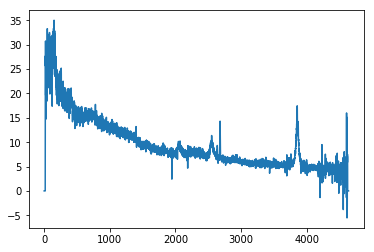

In [79]:
plt.plot(range(len(x[0])), x[0].flatten())

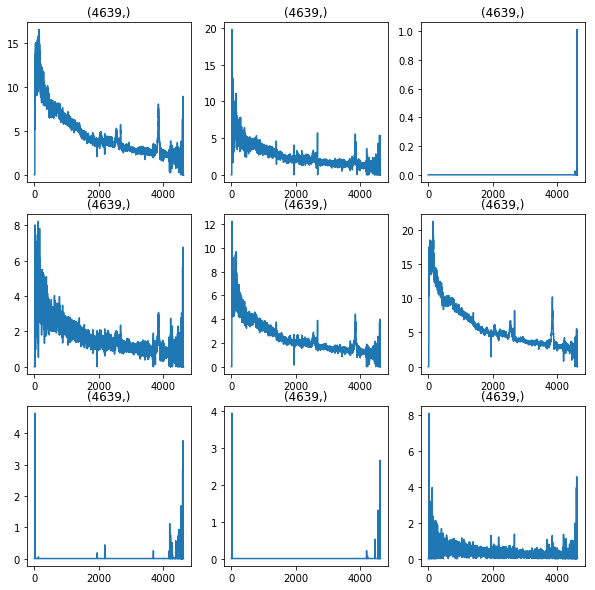

In [80]:
# Plotting Convolutions
fig, axs = plt.subplots(3,3, figsize=(10,10))
for ix, ax in enumerate(axs.flatten()):
    ax.set_title('{}'.format(convs[0][:,ix].shape))
    ax.plot(convs[0][:,ix])